In [ ]:
import tensorflow as tf
from tqdm import tqdm
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

100%|██████████| 16/16 [00:02<00:00,  5.77it/s]


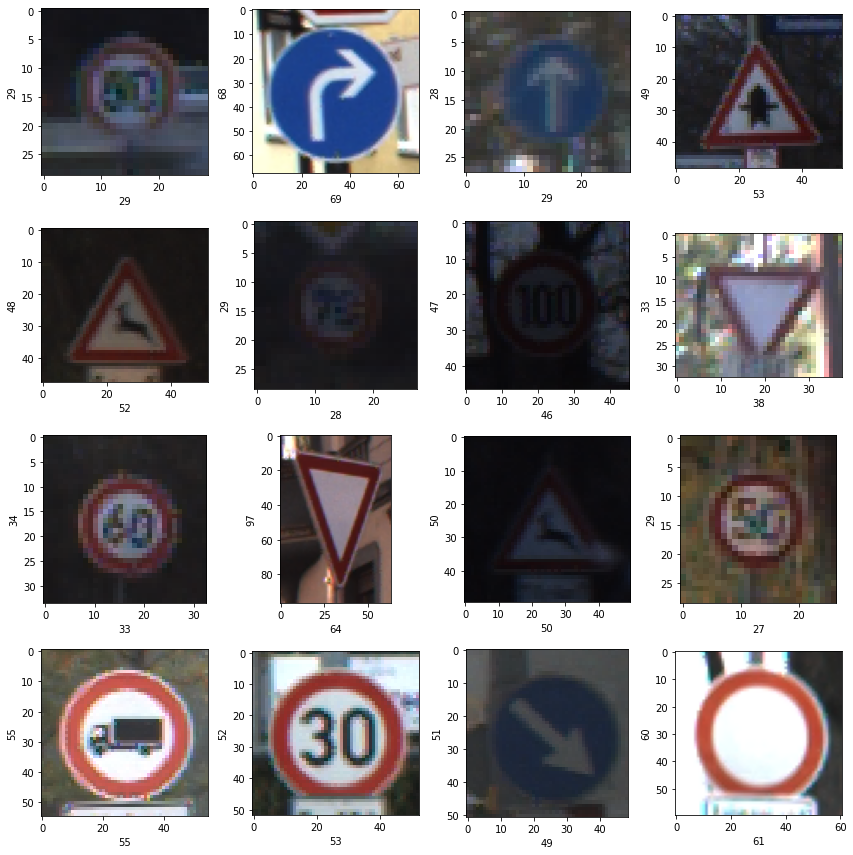

In [ ]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "archive/Test"
for i in tqdm(range(1,17)):
    plt.subplot(4,4,i)
    plt.tight_layout()
    list = os.listdir(path)
    random_file = random.choice(sorted(list))
    rand_img = image.imread(path +'/'+ random_file)
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10) #Width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10) #height of image

In [23]:
# AS size of image are different we have to make them equal so we will take mean of dimension
dim1 = []
dim2 = []

for i in tqdm(range(0,43)):
    labels = 'archive/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = image.imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

100%|██████████| 43/43 [00:36<00:00,  1.16it/s]


In [24]:
#printing the mean dimension of images
print('Dimension 1 mean : ',np.mean(dim1), ' Dimension 2 mean : ', np.mean(dim2))

Dimension 1 mean :  50.328929582493814  Dimension 2 mean :  50.83587951745773


In [25]:
# reshape the image to (50, 50)
images = []
labels_id = []
for i in tqdm(range(0,43)):
    labels = 'archive/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)
        labels_id.append(i)

100%|██████████| 43/43 [00:31<00:00,  1.39it/s]


In [ ]:
# converting images into np array
images = np.array(images)
#scale the pixel value between 0 and 1
images = images/255

In [ ]:
labels_id = np.array(labels_id)
labels_id.shape

(39209,)

In [ ]:
images.shape

(39209, 50, 50, 3)

In [ ]:
# visualise the number of classes count
label_counts = pd.DataFrame(labels_id).value_counts()
label_counts.head()

2     2250
1     2220
13    2160
12    2100
38    2070
dtype: int64

In [ ]:
# splitting the data
x_train, x_val, y_train, y_val = train_test_split(images, labels_id, test_size= 0.2, random_state= 42)

In [ ]:
#keras has a built-in function for one-hot encoding
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

In [ ]:
model = Sequential()

model.add(Conv2D(filters= 64, kernel_size= (3,3), input_shape= x_train.shape[1:], activation='relu',padding= 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters= 64, kernel_size= (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation= 'softmax'))


2021-12-03 16:15:00.808781: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
model.compile(loss= 'sparse_categorical_crossentropy', optimizer= 'adam', metrics= ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0

In [ ]:
model.fit(x_train, y_train, batch_size= 128, epochs = 10, validation_data=(x_val, y_val), verbose= 2)

Epoch 1/10
246/246 - 103s - loss: 1.1809 - accuracy: 0.6299 - val_loss: 0.4574 - val_accuracy: 0.9059
Epoch 2/10
246/246 - 102s - loss: 0.7583 - accuracy: 0.7589 - val_loss: 0.3024 - val_accuracy: 0.9521
Epoch 3/10
246/246 - 102s - loss: 0.5866 - accuracy: 0.8111 - val_loss: 0.1936 - val_accuracy: 0.9586
Epoch 4/10
246/246 - 105s - loss: 0.4917 - accuracy: 0.8413 - val_loss: 0.1674 - val_accuracy: 0.9746
Epoch 5/10
246/246 - 104s - loss: 0.4168 - accuracy: 0.8653 - val_loss: 0.1280 - val_accuracy: 0.9797
Epoch 6/10
246/246 - 103s - loss: 0.3709 - accuracy: 0.8813 - val_loss: 0.1021 - val_accuracy: 0.9821
Epoch 7/10
246/246 - 104s - loss: 0.3488 - accuracy: 0.8889 - val_loss: 0.0850 - val_accuracy: 0.9825
Epoch 8/10
246/246 - 100s - loss: 0.3133 - accuracy: 0.8973 - val_loss: 0.0729 - val_accuracy: 0.9844
Epoch 9/10
246/246 - 100s - loss: 0.2895 - accuracy: 0.9054 - val_loss: 0.0664 - val_accuracy: 0.9864
Epoch 10/10
246/246 - 100s - loss: 0.2698 - accuracy: 0.9113 - val_loss: 0.0611 - 

<AxesSubplot:>

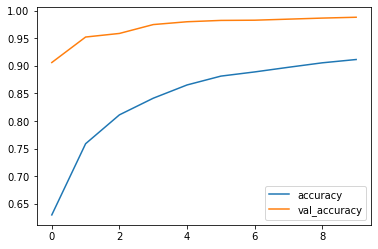

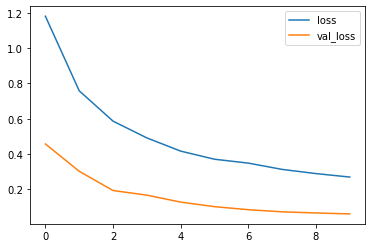

In [ ]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

In [26]:
test_path = 'archive/Test'
!rm archive/Test/GT-final_test.csv

In [27]:
def scaling(test_images, test_path):
    imagesT= []
    image_path = test_images
    for x in image_path:
        img = Image.open(test_path + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        imagesT.append(img)

    #Converting imaes into numpy array
    imagesT = np.array(imagesT)
    imagesT = imagesT/255
    return imagesT

In [28]:
test_images = scaling(sorted(os.listdir(test_path)), test_path)

In [29]:
test = pd.read_csv('archive/Test.csv')
y_test = test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10])

In [39]:
y_pred = np.argmax(model.predict(test_images), axis=1)
y_pred

array([16,  1, 38, ..., 38,  7, 10])

In [33]:
model.save('model.h5')

In [40]:
# Storing all lables
all_lables = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vechiles over 3.5 metric']

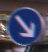

In [46]:
# Visualize test image
img = Image.open(test_path + '/00002.png')
img

In [47]:
# Original label
print("Original label : ",all_lables[y_test[2]])

Original label :  Keep right


In [48]:
# Predicted label
print("Predicted label : ",all_lables[y_pred[2]])

Predicted label :  Keep right
